In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv(r'C:\Users\jackm\Documents\Data Analytics\CW\2017Merge.csv')

In [63]:
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,NORWAY,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,...,96.8,64,33.2,47.6/9.2,8204,233,100.0/100.0,98.0/98.3,-99,-99
1,DENMARK,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,...,96.3,47,14.4,33.5/5.9,666,119,100.0/100.0,99.6/99.6,-99,-99
2,ICELAND,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,...,98.2,27,0.5,2.0/6.1,284,952,100.0/100.0,98.7/100.0,-99,-99
3,SWITZERLAND,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,...,88.0,74,31.6,35.3/4.3,552,126,100.0/100.0,99.9/99.8,-99,-99
4,FINLAND,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,92.7,36,73.1,47.3/8.6,757,257,100.0/100.0,99.4/88.0,-99,-99


In [64]:
#Happiness rank corresponds to score, rank can be dropped.
del df['Happiness.Rank']

In [65]:
#Other scores that determine the overall happiness score will not be relevant to the model
del df['Whisker.high']
del df['Whisker.low']
del df['Economy..GDP.per.Capita.']
del df['Family']
del df['Health..Life.Expectancy.']
del df['Freedom']
del df['Generosity']
del df['Trust..Government.Corruption.']
del df['Dystopia.Residual']

In [66]:
#check new column headings
df.head()

,Country,Happiness.Score,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,NORWAY,7.537,NorthernEurope,386194,5305,14.5,101.8,386578,1.6,74185.5,...,96.8,64,33.2,47.6/9.2,8204,233,100.0/100.0,98.0/98.3,-99,-99
1,DENMARK,7.522,NorthernEurope,42921,5734,135.1,99.0,301308,1.6,53149.3,...,96.3,47,14.4,33.5/5.9,666,119,100.0/100.0,99.6/99.6,-99,-99
2,ICELAND,7.504,NorthernEurope,103000,335,3.3,100.7,16780,4.2,50936.0,...,98.2,27,0.5,2.0/6.1,284,952,100.0/100.0,98.7/100.0,-99,-99
3,SWITZERLAND,7.494,WesternEurope,41291,8476,214.5,98.2,670790,0.8,80831.1,...,88.0,74,31.6,35.3/4.3,552,126,100.0/100.0,99.9/99.8,-99,-99
4,FINLAND,7.469,NorthernEurope,338440,5523,18.2,97.2,231960,0.2,42148.1,...,92.7,36,73.1,47.3/8.6,757,257,100.0/100.0,99.4/88.0,-99,-99


In [67]:
#Find min and max
a = df['GDP growth rate (annual %, const. 2005 prices)'].max()
b= df['GDP growth rate (annual %, const. 2005 prices)'].min()

print('Max: %s Min: %s '%(a, b))

Max: 26.3 Min: -28.1 


In [68]:
#Find min Happiness rating
df['Happiness.Score'].min()

2.6930000780000003

(2, 8)

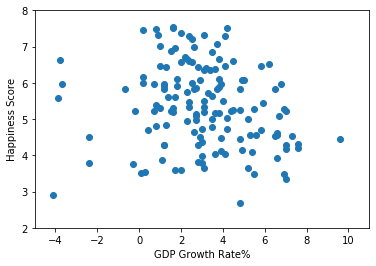

In [69]:
#plot of growth rate Ireland acts as outlier and distorts plot, can be ignored to assess general trend as do scores in extreme negative
#both types ignored for smaller range
plt.scatter(df['GDP growth rate (annual %, const. 2005 prices)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("GDP Growth Rate%")
plt.xlim([-5, 11])
plt.ylim([2, 8])
#growth rate between 0 and 4 seem common among nations over 7, otherwise range is wide, no correlation so drop

In [70]:
#plot of GPD total first test min and max
a = df['GDP: Gross domestic product (million current US$)'].min()
b = df['GDP: Gross domestic product (million current US$)'].max()
print('Max: %s Min: %s '%(b, a))

Max: 18036648 Min: 1559 


(1.5, 8.0)

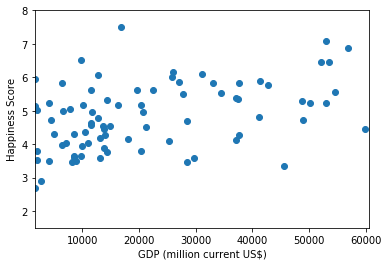

In [71]:
#plot of GDP compared to happiness score USA is an outlier, lower range nations can be looked at
plt.scatter(df['GDP: Gross domestic product (million current US$)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("GDP (million current US$)")
plt.xlim([1559, 60648])
plt.ylim([1.5, 8.0])
#large disparity makes this hard to measure, large GDP appears to be linked to happiness in some instances by plenty of 7+ ratings
#with lower GPD have dropped top performers to get better idea, some trend suggested but outliers makes it difficult to tell how useful

In [72]:
#plot of GPD per capita total, first test min and max
a = df['GDP per capita (current US$)'].min()
b = df['GDP per capita (current US$)'].max()
print('Max: %s Min: %s '%(b, a))

Max: 100160.8 Min: 144.5 


(1.5, 8.0)

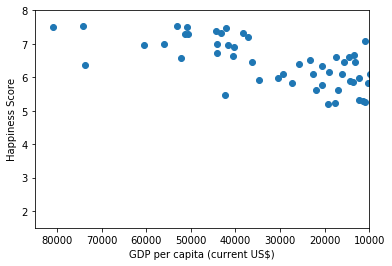

In [73]:
#plot of GDP per capita compared to happiness score Lux is an outlier so dropped and split into 2 plots
plt.scatter(df['GDP per capita (current US$)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("GDP per capita (current US$)")
plt.xlim([85000, 10000])
plt.ylim([1.5, 8.0])
#definite trend among those countries scoring highly

(1.5, 8.0)

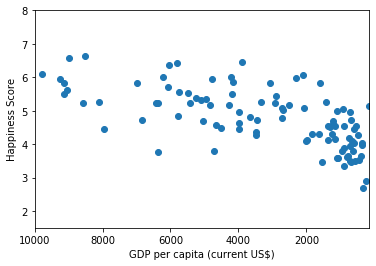

In [74]:
# plot GDP per capita lower GPD 
plt.scatter(df['GDP per capita (current US$)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("GDP per capita (current US$)")
plt.xlim([10000, 144.5])
plt.ylim([1.5, 8.0])
#again definite trend, better indicator than GDP gross and GDP growth

(1.5, 8.0)

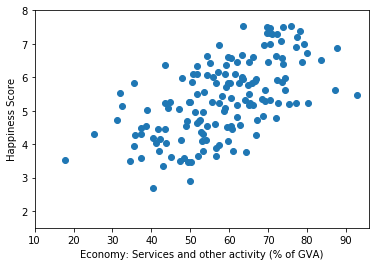

In [75]:
#plot of percantage economy in services
plt.scatter(df['Economy: Services and other activity (% of GVA)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Economy: Services and other activity (% of GVA)")
plt.xlim([10, 96])
plt.ylim([1.5, 8.0])

(1.5, 8.0)

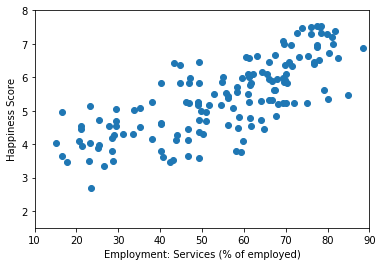

In [76]:
#plot of percentage employed in services
plt.scatter(df['Employment: Services (% of employed)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Employment: Services (% of employed)")
plt.xlim([10, 90])
plt.ylim([1.5, 8.0])
#appears to plot better than economy, test again with industry comparison

(0, 40)

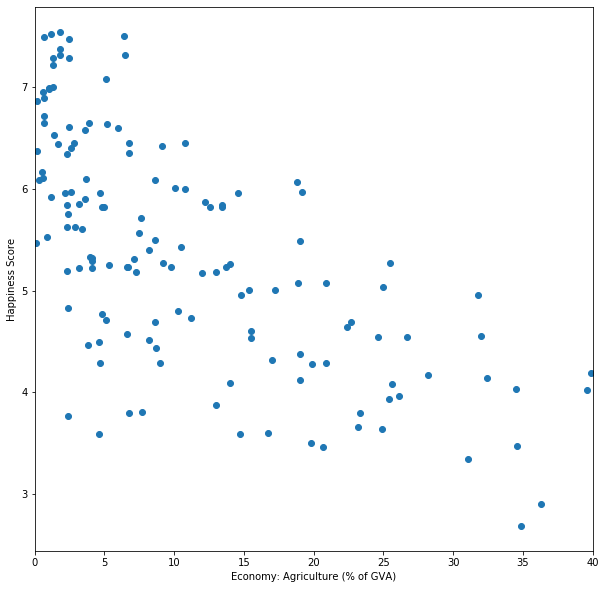

In [77]:
#Plot Economy: Agriculture % of GVA)
plt.figure(figsize=(10,10))
df['Economy: Agriculture (% of GVA)'] = pd.to_numeric(df['Economy: Agriculture (% of GVA)'],errors='coerce')
plt.scatter(df['Economy: Agriculture (% of GVA)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Economy: Agriculture (% of GVA)")
plt.xlim([0, 40])
#double check once axis ordered but % employment seems to be a better measure in all 3 categories

(1.5, 8.0)

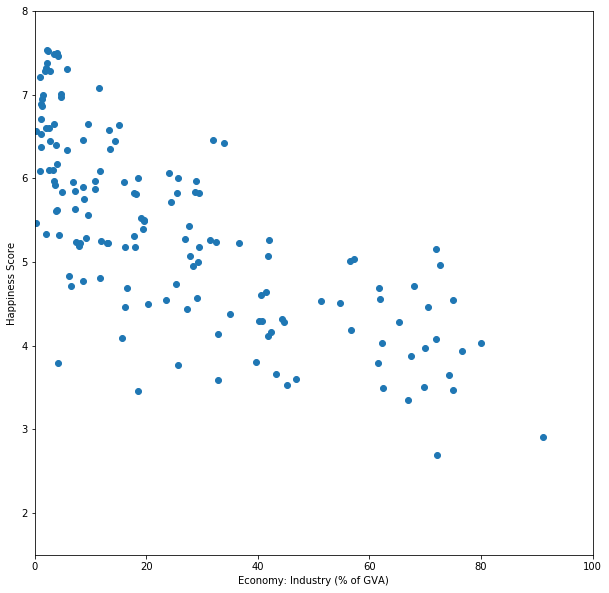

In [78]:
#Plot Employment: Agriculture (% of employed)
plt.figure(figsize=(10, 10))
plt.scatter(df['Employment: Agriculture (% of employed)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Economy: Industry (% of GVA)")
plt.xlim([0, 100])
plt.ylim([1.5, 8.0])
#Correlation but not as strong as previous

(1.5, 8.0)

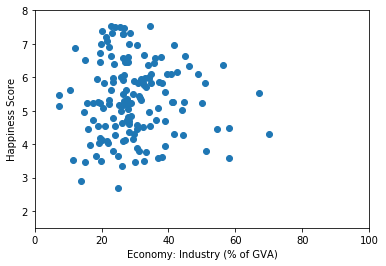

In [79]:
# Economy: Industry (% of GVA)
plt.scatter(df['Economy: Industry (% of GVA)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Economy: Industry (% of GVA)")
plt.xlim([0, 100])
plt.ylim([1.5, 8.0])
#No correlation

(1.5, 8.0)

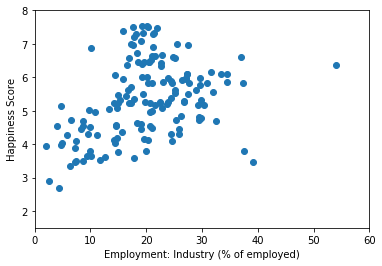

In [80]:
# Employment: Industry (% of employed)
plt.scatter(df['Employment: Industry (% of employed)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Employment: Industry (% of employed)")
plt.xlim([0, 60])
plt.ylim([1.5, 8.0])
#both appear to be quite similar but more of a trend than in %employed version accross all three sectors

Text(0.5, 0, 'Agricultural production index (2004-2006=100)')

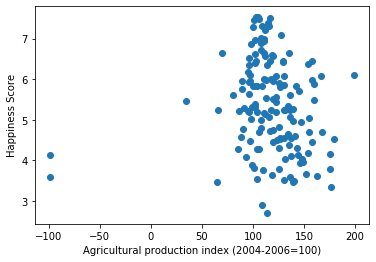

In [81]:
#Agricultural production index (2004-2006=100)
plt.scatter(df['Agricultural production index (2004-2006=100)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Agricultural production index (2004-2006=100)")
#appears to be worth dropping

Text(0.5, 0, 'Food production index (2004-2006=100)')

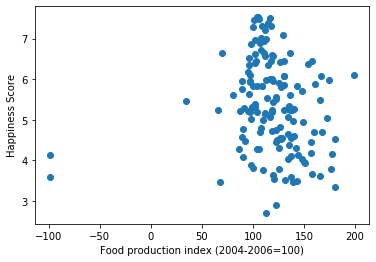

In [82]:
#Food production index (2004-2006=100)
plt.scatter(df['Food production index (2004-2006=100)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Food production index (2004-2006=100)")
#Near identical to Agricultural production index, drop

Text(0.5, 0, 'Population growth rate (average annual %)')

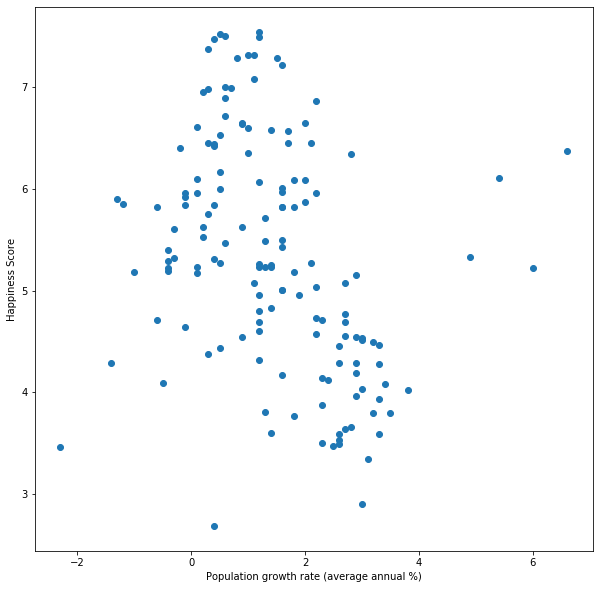

In [83]:
#Population growth rate (average annual %)
plt.figure(figsize=(10, 10))
#convert to numeric
df['Population growth rate (average annual %)'] = pd.to_numeric(df['Population growth rate (average annual %)'],errors='coerce')
plt.scatter(df['Population growth rate (average annual %)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Population growth rate (average annual %)")
#plt.xlim([0, 100])
#high scorers in similar cluster, but not good measure might be worth dropping

Text(0.5, 0, 'Fertility rate, total (live births per woman)')

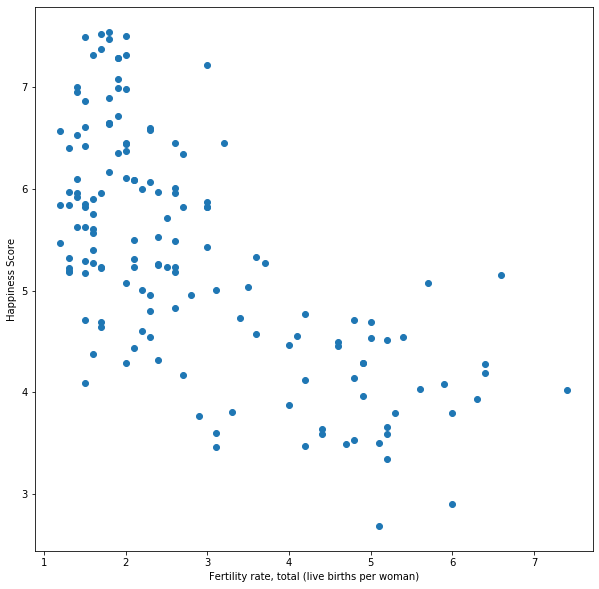

In [84]:
#Fertility rate, total (live births per woman)
plt.figure(figsize=(10, 10))
df['Fertility rate, total (live births per woman)'] = pd.to_numeric(df['Fertility rate, total (live births per woman)'],errors='coerce')
plt.scatter(df['Fertility rate, total (live births per woman)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Fertility rate, total (live births per woman)")
#some correlation and most high scorers have low fertility rate

(-20, 100)

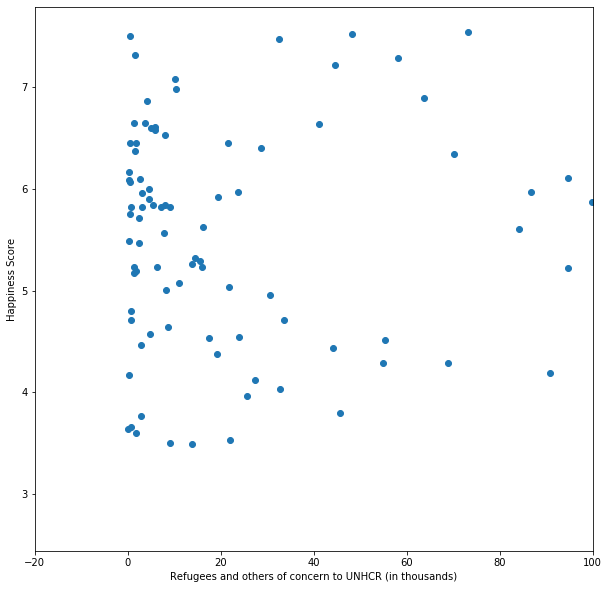

In [85]:
#Refugees and others of concern to UNHCR (in thousands)
plt.figure(figsize=(10,10))
#convert to numeric
df['Refugees and others of concern to UNHCR (in thousands)'] = pd.to_numeric(df['Refugees and others of concern to UNHCR (in thousands)'],errors='coerce')
plt.scatter(df['Refugees and others of concern to UNHCR (in thousands)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel("Refugees and others of concern to UNHCR (in thousands)")
plt.xlim(-20, 100)
#lots of zeros/near zeros, makes correlation difficult to determine, appears to be worth dropping

(1.5, 8.0)

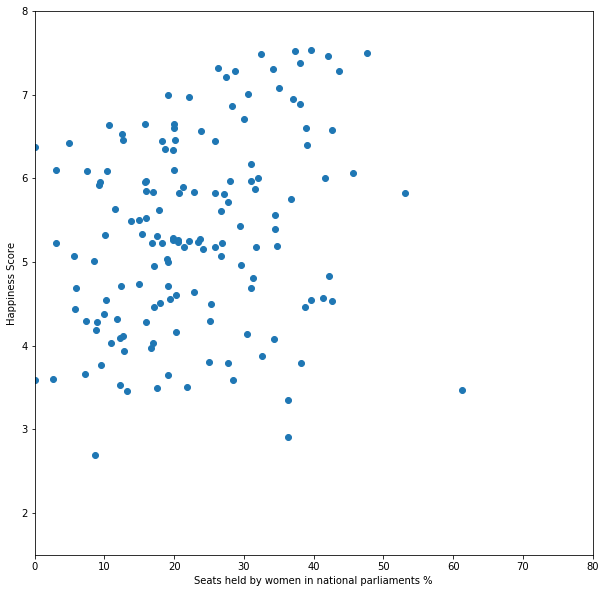

In [86]:
#Seats held by women in national parliaments %
plt.figure(figsize=(10,10))
plt.scatter(df['Seats held by women in national parliaments %'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Seats held by women in national parliaments %")
plt.xlim([0, 80])
plt.ylim([1.5, 8.0])
#Weak trend

Text(0.5, 0, 'Infant mortality rate (per 1000 live births')

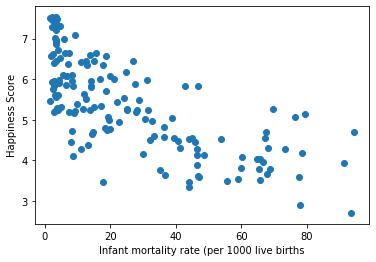

In [87]:
#Infant mortality rate (per 1000 live births)
plt.scatter(df['Infant mortality rate (per 1000 live births'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Infant mortality rate (per 1000 live births")
#Definite trend, keep

(0, 7)

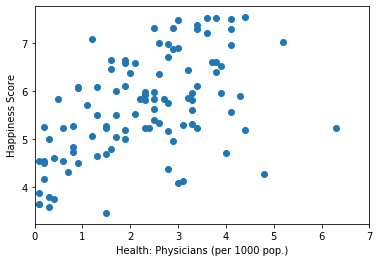

In [88]:
#Health: Physicians (per 1000 pop.)
#convert to number
df['Health: Physicians (per 1000 pop.)'] = pd.to_numeric(df['Health: Physicians (per 1000 pop.)'],errors='coerce')
x_values = df['Health: Physicians (per 1000 pop.)']
y_values = df['Happiness.Score']
plt.scatter(x_values.values, y_values.values);
plt.ylabel("Happiness Score")
plt.xlabel("Health: Physicians (per 1000 pop.)")
#eliminate outliers by restricting graph range
plt.xlim(0, 7)
#Definite trend, keep

(0, 20)

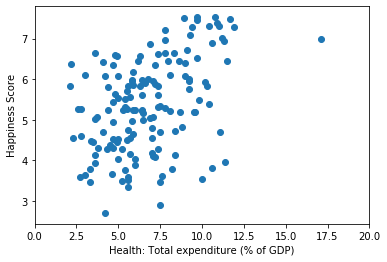

In [89]:
#Health: Total expenditure (% of GDP)
plt.scatter(df['Health: Total expenditure (% of GDP)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Health: Total expenditure (% of GDP)")
plt.xlim([0, 20])
#is a trend, perhaps too similar to physicians, if dropping one drop this one

Text(0.5, 0, 'Unemployment (% of labour force)')

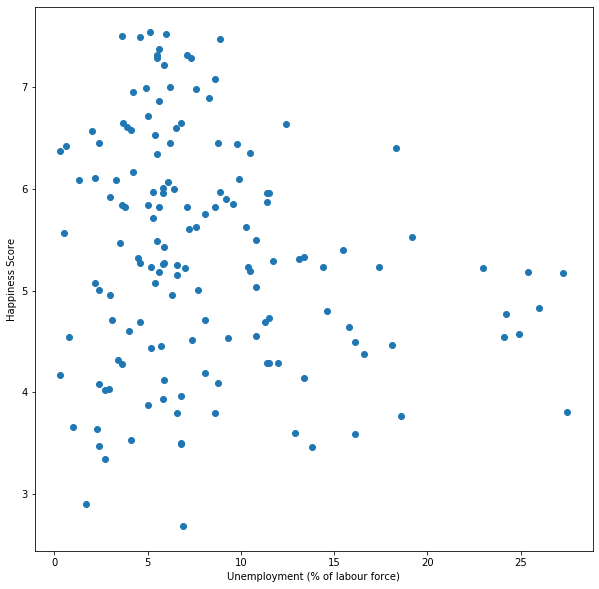

In [90]:
# Unemployment (% of labour force)
#convert data to number
df['Unemployment (% of labour force)'] = pd.to_numeric(df['Unemployment (% of labour force)'],errors='coerce')
plt.figure(figsize=(10,10))
plt.scatter(df['Unemployment (% of labour force)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Unemployment (% of labour force)")
# No trend, drop

Text(0.5, 0, 'Urban population (% of total population)')

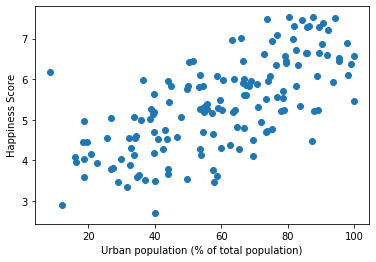

In [91]:
#Urban population (% of total population)
plt.scatter(df['Urban population (% of total population)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Urban population (% of total population)")
#Correlation, keep

Text(0.5, 0, 'Urban population growth rate (average annual %)')

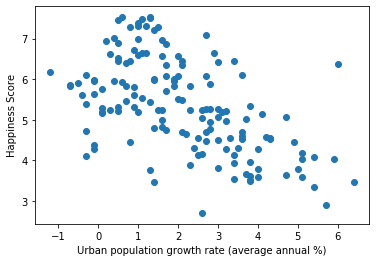

In [92]:
#Urban population growth rate (average annual %)
#change to number
df['Urban population growth rate (average annual %)'] = pd.to_numeric(df['Urban population growth rate (average annual %)'],errors='coerce')
plt.scatter(df['Urban population growth rate (average annual %)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Urban population growth rate (average annual %)")
#some correlation, but drop one of this and overall urban population

Text(0.5, 0, 'Mobile-cellular subscriptions (per 100 inhabitants)')

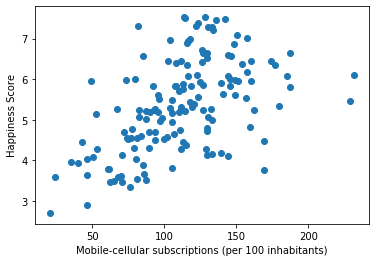

In [93]:
#Mobile-cellular subscriptions (per 100 inhabitants)
plt.scatter(df['Mobile-cellular subscriptions (per 100 inhabitants)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Mobile-cellular subscriptions (per 100 inhabitants)")
#trend so keep, numbers go above 100-does this mean many have multiple subscriptions? not as good as following so drop

Text(0.5, 0, 'Mobile-cellular subscriptions (per 100 inhabitants).1')

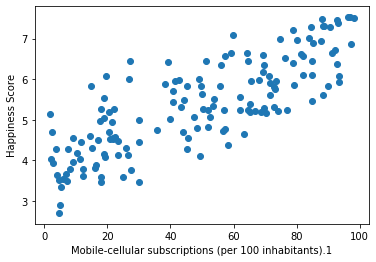

In [94]:
# Mobile-cellular subscriptions (per 100 inhabitants).1
plt.scatter(df['Mobile-cellular subscriptions (per 100 inhabitants).1'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Mobile-cellular subscriptions (per 100 inhabitants).1")
#clearer trend, keep this version rather than previous

Text(0.5, 0, 'Individuals using the Internet (per 100 inhabitants)')

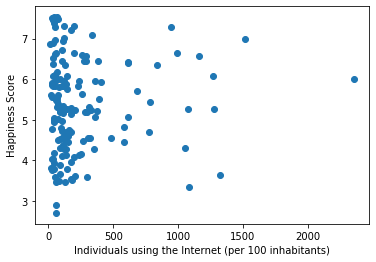

In [95]:
#Individuals using the Internet (per 100 inhabitants)
plt.scatter(df['Individuals using the Internet (per 100 inhabitants)'], df['Happiness.Score']);
plt.ylabel("Happiness Score")
plt.xlabel("Individuals using the Internet (per 100 inhabitants)")
#data unclear and doesn't make sense, drop unless we can decipher it

(0, 80)

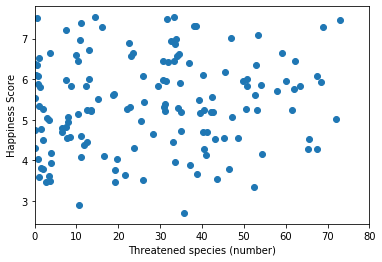

In [96]:
# Threatened species (number)
plt.scatter(df['Threatened species (number)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel("Threatened species (number)")
plt.xlim(0, 80)
#drop

(0, 200)

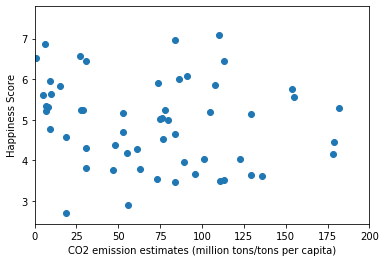

In [97]:
# CO2 emission estimates (million tons/tons per capita)
plt.scatter(df['CO2 emission estimates (million tons/tons per capita)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('CO2 emission estimates (million tons/tons per capita)')
#limit range to remove outliers
plt.xlim(0, 200)
#range too great to properly determine, drop

(0, 200)

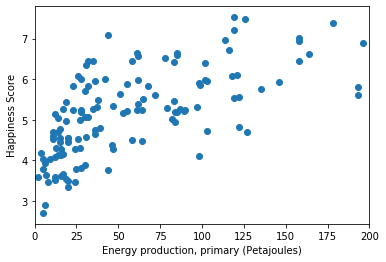

In [98]:
#Energy production, primary (Petajoules)
plt.scatter(df['Energy production, primary (Petajoules)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Energy production, primary (Petajoules)')
#limit range
plt.xlim(0, 200)
#weak trend

Text(0.5, 0, 'Pop. using improved sanitation facilities (urban/rural, %)')

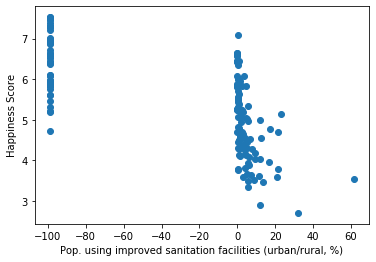

In [99]:
#Pop. using improved sanitation facilities (urban/rural, %)
df['Pop. using improved sanitation facilities (urban/rural, %)'] = pd.to_numeric(df['Pop. using improved sanitation facilities (urban/rural, %)'],errors='coerce')
plt.scatter(df['Pop. using improved sanitation facilities (urban/rural, %)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Pop. using improved sanitation facilities (urban/rural, %)')
#No trend drop, lots of null values

Text(0.5, 0, 'Net Official Development Assist. received (% of GNI)')

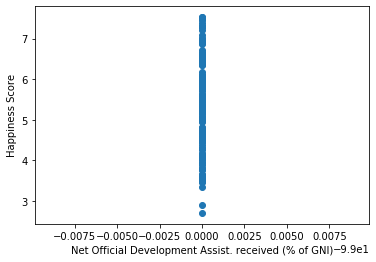

In [100]:
#Net Official Development Assist. received (% of GNI)
df['Net Official Development Assist. received (% of GNI)'] = pd.to_numeric(df['Net Official Development Assist. received (% of GNI)'],errors='coerce')
plt.scatter(df['Net Official Development Assist. received (% of GNI)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Net Official Development Assist. received (% of GNI)')
#all values null, drop

(0, 900000)

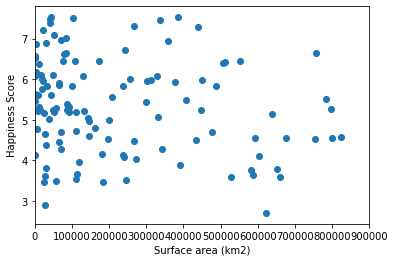

In [101]:
#Surface area (km2)

plt.scatter(df['Surface area (km2)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Surface area (km2)')
plt.xlim(0, 900000)
#drop

(0, 200000)

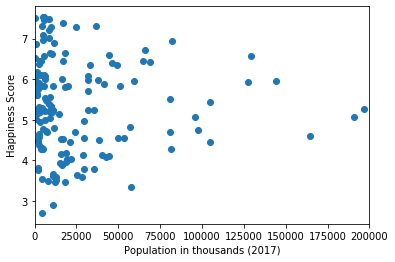

In [102]:
#Population in thousands (2017)
df['Population in thousands (2017)'] = pd.to_numeric(df['Population in thousands (2017)'],errors='coerce')
plt.scatter(df['Population in thousands (2017)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Population in thousands (2017)')
#reduce range
plt.xlim(0, 200000)
#drop

(0, 800)

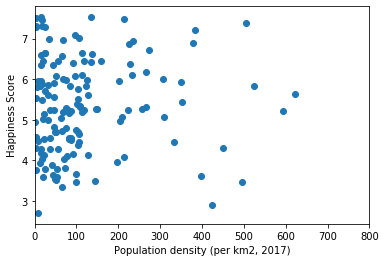

In [103]:
#Population density (per km2, 2017)
plt.scatter(df['Population density (per km2, 2017)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Population density (per km2, 2017)')
#limit range
plt.xlim(0, 800)
#drop

(80, 150)

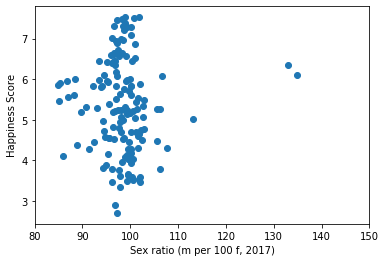

In [104]:
# Sex ratio (m per 100 f, 2017)
plt.scatter(df['Sex ratio (m per 100 f, 2017)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Sex ratio (m per 100 f, 2017)')
#limit range
plt.xlim(80, 150)
#little variation, drop

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

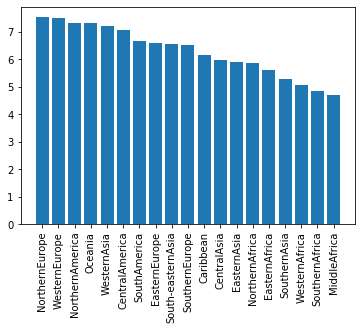

In [105]:
# Region
plt.bar(df['Region'], df['Happiness.Score'])
plt.xticks(rotation=90)
#trend

(0, 10)

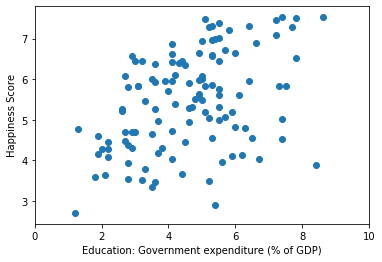

In [106]:
# Education: Government expenditure (% of GDP)
df['Education: Government expenditure (% of GDP)'] = pd.to_numeric(df['Education: Government expenditure (% of GDP)'],errors='coerce')
plt.scatter(df['Education: Government expenditure (% of GDP)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Education: Government expenditure (% of GDP)')
#drop nulls by reducing range
plt.xlim(0, 10)
#weak trend at best, drop

(0, 100000)

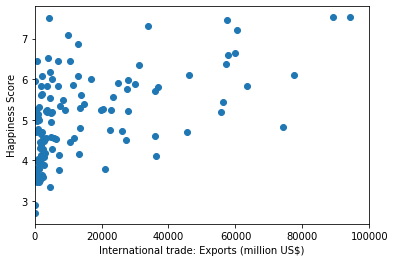

In [107]:
#International trade: Exports (million US$)
plt.scatter(df['International trade: Exports (million US$)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('International trade: Exports (million US$)')
#reduce range for clearer trend
plt.xlim(0, 100000)
#drop

(0, 500000)

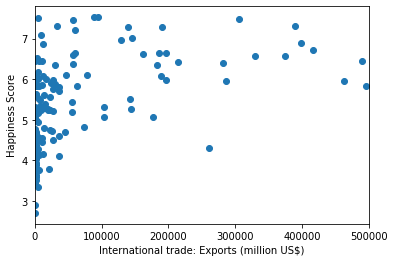

In [108]:
#International trade: Imports (million US$)
plt.scatter(df['International trade: Exports (million US$)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('International trade: Exports (million US$)')
#limit range
plt.xlim(0, 500000)
#drop

(-70000, 40000)

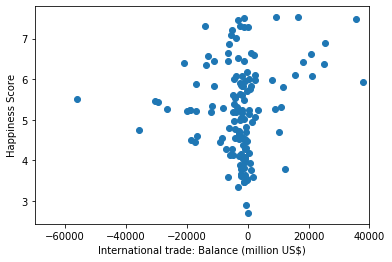

In [109]:
#International trade: Balance (million US$)
plt.scatter(df['International trade: Balance (million US$)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('International trade: Balance (million US$)')
#limit range 
plt.xlim(-70000, 40000)
#appears to be no trend

(-10000, 10000)

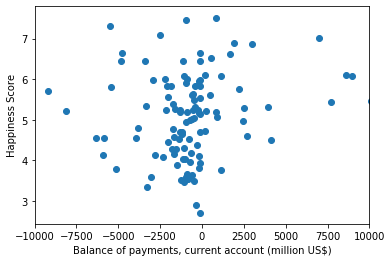

In [110]:
# Balance of payments, current account (million US$)
df['Balance of payments, current account (million US$)'] = pd.to_numeric(df['Balance of payments, current account (million US$)'],errors='coerce')
plt.scatter(df['Balance of payments, current account (million US$)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Balance of payments, current account (million US$)')
#limit range 
plt.xlim(-10000, 10000)
#drop

In [111]:
#Split for life expextancy and drop original column
new = df['Life expectancy at birth (females/males, years)'].str.split('/', n=1, expand= True)
df['Female Life Expectancy at birth (years)'] = new[0]
df['Male Life Expectancy at birth (years)'] = new[1]
df.drop(columns = 'Life expectancy at birth (females/males, years)', inplace = True)

In [112]:
df.head()

,Country,Happiness.Score,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Female Life Expectancy at birth (years),Male Life Expectancy at birth (years)
0,NORWAY,7.537,NorthernEurope,386194,5305,14.5,101.8,386578,1.6,74185.5,...,33.2,47.6/9.2,8204,233,100.0/100.0,98.0/98.3,-99.0,-99,83.6,79.5
1,DENMARK,7.522,NorthernEurope,42921,5734,135.1,99.0,301308,1.6,53149.3,...,14.4,33.5/5.9,666,119,100.0/100.0,99.6/99.6,-99.0,-99,82.2,78.1
2,ICELAND,7.504,NorthernEurope,103000,335,3.3,100.7,16780,4.2,50936.0,...,0.5,2.0/6.1,284,952,100.0/100.0,98.7/100.0,-99.0,-99,83.8,80.6
3,SWITZERLAND,7.494,WesternEurope,41291,8476,214.5,98.2,670790,0.8,80831.1,...,31.6,35.3/4.3,552,126,100.0/100.0,99.9/99.8,-99.0,-99,84.8,80.5
4,FINLAND,7.469,NorthernEurope,338440,5523,18.2,97.2,231960,0.2,42148.1,...,73.1,47.3/8.6,757,257,100.0/100.0,99.4/88.0,-99.0,-99,83.7,77.7


Text(0.5, 0, 'Female Life Expectancy at birth (years)')

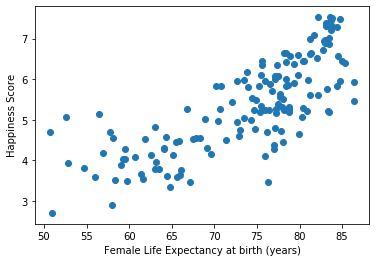

In [113]:
# Test female life expextancy
df['Female Life Expectancy at birth (years)'] = pd.to_numeric(df['Female Life Expectancy at birth (years)'],errors='coerce')
plt.scatter(df['Female Life Expectancy at birth (years)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Female Life Expectancy at birth (years)')
#definite trend

Text(0.5, 0, 'Male Life Expectancy at birth (years)')

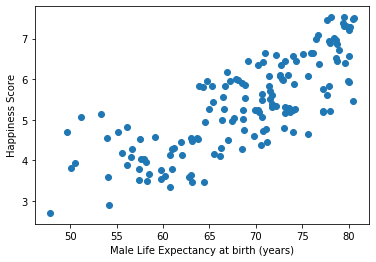

In [114]:
#Test male life expectancy
df['Male Life Expectancy at birth (years)'] = pd.to_numeric(df['Male Life Expectancy at birth (years)'],errors='coerce')
plt.scatter(df['Male Life Expectancy at birth (years)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Male Life Expectancy at birth (years)')
#similar to female, drop one of the two

In [115]:
# Population age distribution (0-14 / 60+ years, %), need to split and subtract to get difference
new = df['Population age distribution (0-14 / 60+ years, %)'].str.split('/', n=1, expand= True)
df['Population age % 60+'] = new[1]
df['Population age % 0-14'] = new[0]
df.drop(columns = 'Population age distribution (0-14 / 60+ years, %)', inplace = True)

Text(0.5, 0, 'Population age % 60+')

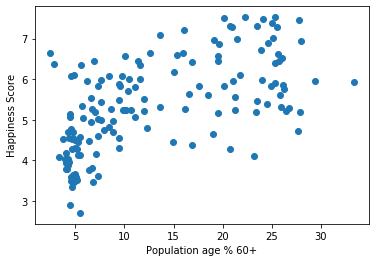

In [116]:
#test 60+
df['Population age % 60+'] = pd.to_numeric(df['Population age % 60+'],errors='coerce')
plt.scatter(df['Population age % 60+'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Population age % 60+')
#no trend

Text(0.5, 0, 'Population age % 0-14')

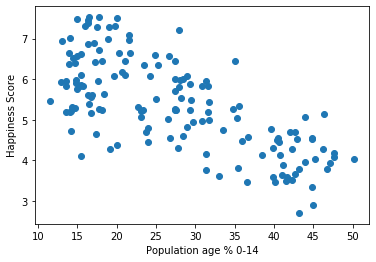

In [117]:
#under 14
df['Population age % 0-14'] = pd.to_numeric(df['Population age % 0-14'],errors='coerce')
plt.scatter(df['Population age % 0-14'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Population age % 0-14')
#trend, keep

In [118]:
#Energy supply per capita (Gigajoules) might not be accurate depending on how measure works TEST
new = df['Energy supply per capita (Gigajoules)'].str.split('/', n=1, expand= True)
df['Energy supply per capita (Gigajoules)1'] = new[0]
df['Energy supply per capita (Gigajoules)2'] = new[1]
df['Energy supply per capita (Gigajoules)1'] = pd.to_numeric(df['Energy supply per capita (Gigajoules)1'],errors='coerce')
df['Energy supply per capita (Gigajoules)2'] = pd.to_numeric(df['Energy supply per capita (Gigajoules)2'], errors='coerce')

df['Energy total'] = df['Energy supply per capita (Gigajoules)1']/df['Energy supply per capita (Gigajoules)2']
df.drop(columns = 'Energy supply per capita (Gigajoules)', inplace = True)
df.drop(columns = 'Energy supply per capita (Gigajoules)1', inplace = True)
df.drop(columns = 'Energy supply per capita (Gigajoules)2', inplace = True)

(0, 3)

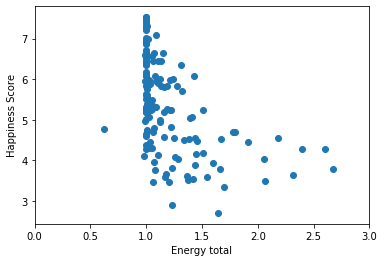

In [119]:
#plot new energy total
plt.scatter(df['Energy total'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Energy total')
#limit range
plt.xlim(0, 3)
#too little variation to be useful, drop

In [122]:
# Pop. using improved drinking water (urban/rural, %)
new = df['Pop. using improved drinking water (urban/rural, %)'].str.split('/', n=1, expand= True)
df['Pop. using improved drinking water urban (%)'] = new[0]
df['Pop. using improved drinking water rural (%)'] = new[1]
df['Pop. using improved drinking water urban (%)'] = pd.to_numeric(df['Pop. using improved drinking water urban (%)'],errors='coerce')
df['Pop. using improved drinking water rural (%)'] = pd.to_numeric(df['Pop. using improved drinking water rural (%)'], errors='coerce')
df.drop(columns = 'Pop. using improved drinking water (urban/rural, %)', inplace = True)

(98, 100)

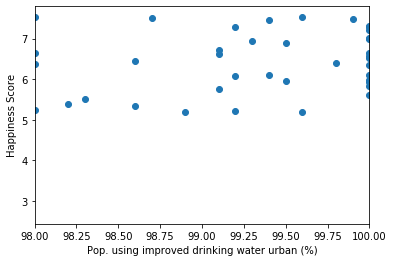

In [123]:
# Pop. using improved drinking water urban (%)
plt.scatter(df['Pop. using improved drinking water urban (%)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Pop. using improved drinking water urban (%)')
#eliminate outliers by limiting range
plt.xlim(98, 100)
#trend but low variation at the top

(80, 100)

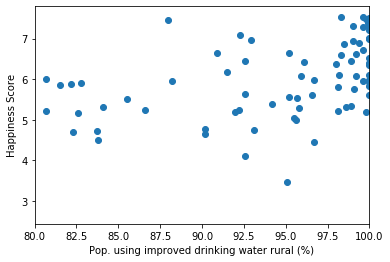

In [124]:
# Pop. using improved drinking water rural (%)
plt.scatter(df['Pop. using improved drinking water rural (%)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Pop. using improved drinking water rural (%)')
#eliminate outliers by limiting range
plt.xlim(80, 100)
#worse than urban so drop and low variation in both = drop both

In [125]:
#Labour force participation (female/male pop. %) measure male only as female won't combine due to value error
new = df['Labour force participation (female/male pop. %)'].str.split('/', n=1, expand= True)
df['Labour force participation Male pop. %)'] = new[0]

df['Labour force participation Male pop. %)'] = pd.to_numeric(df['Labour force participation Male pop. %)'],errors='coerce')

df.drop(columns='Labour force participation (female/male pop. %)', inplace = True)


Text(0.5, 0, 'Labour force participation Male pop. %)')

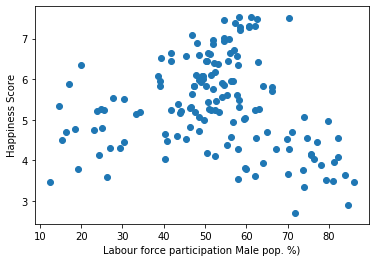

In [126]:
#plot male labour force participation
plt.scatter(df['Labour force participation Male pop. %)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Labour force participation Male pop. %)')
#Drop

In [127]:
#International migrant stock (000/% of total pop.)
new = df['International migrant stock (000/% of total pop.)'].str.split('/', n=1, expand= True)
df['International migrant stock (000s)'] = new[0]
df['International migrant stock (% of total pop.)'] = new[1]
df['International migrant stock (000s)'] = pd.to_numeric(df['International migrant stock (000s)'],errors='coerce')
df['International migrant stock (% of total pop.)'] = pd.to_numeric(df['International migrant stock (% of total pop.)'], errors='coerce')
df.drop(columns='International migrant stock (000/% of total pop.)', inplace = True)

(0, 4000)

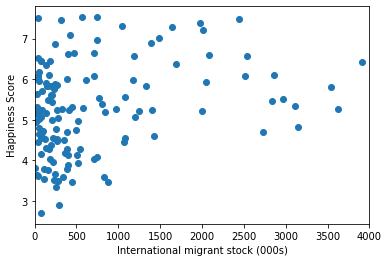

In [128]:
# migrants 1000s
plt.scatter(df['International migrant stock (000s)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('International migrant stock (000s)')
#limit range
plt.xlim(0, 4000)

(0, 40)

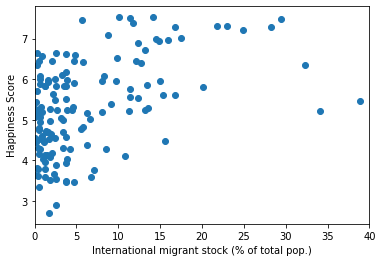

In [129]:
#migrant %
plt.scatter(df['International migrant stock (% of total pop.)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('International migrant stock (% of total pop.)')
plt.xlim(0, 40)
# keep this one if any

In [130]:
# Forested area (% of land area), divide first by second number to get consistent total
new = df['Forested area (% of land area)'].str.split('/', n=1, expand= True)
df['Area 1'] = new[0]
df['Area 2'] = new[1]
df['Area 1'] = pd.to_numeric(df['Area 1'],errors='coerce')
df['Area 2'] = pd.to_numeric(df['Area 2'],errors='coerce')

df['TotalArea'] = df['Area 1'] / df['Area 2']
df.drop(columns = 'Forested area (% of land area)', inplace = True)
df.drop(columns = 'Area 1', inplace = True)
df.drop(columns = 'Area 2', inplace = True)

(0, 150)

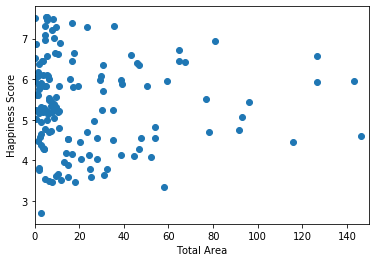

In [131]:
# Forested area (% of land area) total
plt.scatter(df['TotalArea'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Total Area')
#reduce range
plt.xlim(0, 150)
#drop

In [132]:
# Education: Primary gross enrol. ratio (f/m per 100 pop.)
new = df['Education: Primary gross enrol. ratio (f/m per 100 pop.)'].str.split('/', n=1, expand= True)
df['Education: Primary gross enrol. ratio (female per 100 pop.)'] = new[0]
df['Education: Primary gross enrol. ratio (male per 100 pop.)'] = new[1]
df['Education: Primary gross enrol. ratio (female per 100 pop.)'] = pd.to_numeric(df['Education: Primary gross enrol. ratio (female per 100 pop.)'],errors='coerce')
df['Education: Primary gross enrol. ratio (male per 100 pop.)'] = pd.to_numeric(df['Education: Primary gross enrol. ratio (male per 100 pop.)'],errors='coerce')
df.drop(columns = 'Education: Primary gross enrol. ratio (f/m per 100 pop.)', inplace = True)

(80, 150)

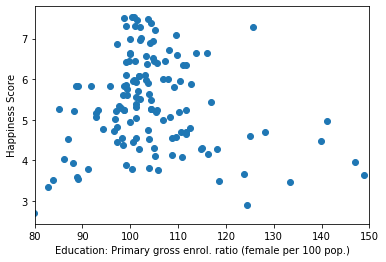

In [133]:
# Education: Primary gross enrol. ratio (female per 100 pop.)
plt.scatter(df['Education: Primary gross enrol. ratio (female per 100 pop.)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Education: Primary gross enrol. ratio (female per 100 pop.)')
plt.xlim(80, 150)
#low variation, drop

(80, 150)

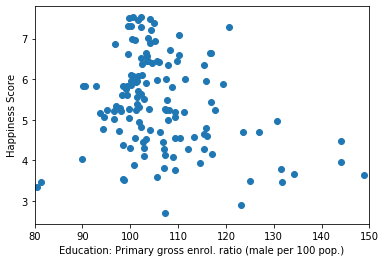

In [134]:
#Primary education males
plt.scatter(df['Education: Primary gross enrol. ratio (male per 100 pop.)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Education: Primary gross enrol. ratio (male per 100 pop.)')
plt.xlim(80, 150)
#drop

In [135]:
# Education: Secondary gross enrol. ratio (f/m per 100 pop.)
new = df['Education: Secondary gross enrol. ratio (f/m per 100 pop.)'].str.split('/', n=1, expand= True)
df['Education: Secondary gross enrol. ratio (female per 100 pop.)'] = new[0]
df['Education: Secondary gross enrol. ratio (male per 100 pop.)'] = new[1]
df['Education: Secondary gross enrol. ratio (female per 100 pop.)'] = pd.to_numeric(df['Education: Secondary gross enrol. ratio (female per 100 pop.)'],errors='coerce')
df['Education: Secondary gross enrol. ratio (male per 100 pop.)'] = pd.to_numeric(df['Education: Secondary gross enrol. ratio (male per 100 pop.)'],errors='coerce')
df.drop(columns = 'Education: Secondary gross enrol. ratio (f/m per 100 pop.)', inplace = True)

(0, 150)

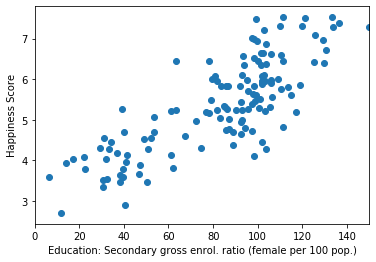

In [136]:
#Secondary education females
plt.scatter(df['Education: Secondary gross enrol. ratio (female per 100 pop.)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Education: Secondary gross enrol. ratio (female per 100 pop.)')
plt.xlim(0, 150)
#trend, keep?

(0, 150)

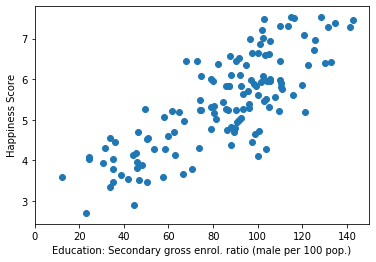

In [137]:
#Secondary education males
plt.scatter(df['Education: Secondary gross enrol. ratio (male per 100 pop.)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Education: Secondary gross enrol. ratio (male per 100 pop.)')
plt.xlim(0, 150)
#keep one of this and female

In [138]:
# Education: Tertiary gross enrol. ratio (f/m per 100 pop.)
new = df['Education: Tertiary gross enrol. ratio (f/m per 100 pop.)'].str.split('/', n=1, expand= True)
df['Education: Tertiary gross enrol. ratio (female per 100 pop.)'] = new[0]
df['Education: Tertiary gross enrol. ratio (male per 100 pop.)'] = new[1]
df['Education: Tertiary gross enrol. ratio (female per 100 pop.)'] = pd.to_numeric(df['Education: Tertiary gross enrol. ratio (female per 100 pop.)'],errors='coerce')
df['Education: Tertiary gross enrol. ratio (male per 100 pop.)'] = pd.to_numeric(df['Education: Tertiary gross enrol. ratio (male per 100 pop.)'],errors='coerce')
df.drop(columns = 'Education: Tertiary gross enrol. ratio (f/m per 100 pop.)', inplace = True)

(0, 124.34485663082438)

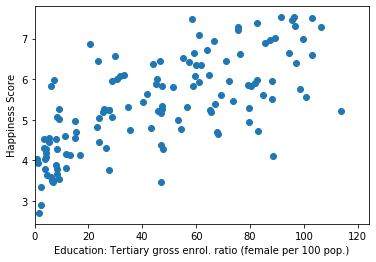

In [139]:
#Tertiary education females
plt.scatter(df['Education: Tertiary gross enrol. ratio (female per 100 pop.)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Education: Tertiary gross enrol. ratio (female per 100 pop.)')
#correlation with some null values, eliminate nulls by limiting range
plt.xlim(0, )
#trend, keep

Text(0.5, 0, 'Education: Tertiary gross enrol. ratio (male per 100 pop.)')

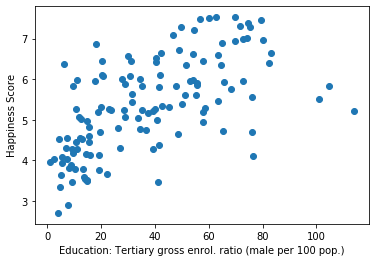

In [140]:
#Tertiary education males
plt.scatter(df['Education: Tertiary gross enrol. ratio (male per 100 pop.)'], df['Happiness.Score'])
plt.ylabel("Happiness Score")
plt.xlabel('Education: Tertiary gross enrol. ratio (male per 100 pop.)')
#trend but stronger trend in females, drop this one

In [141]:
#drop columns that showed no or very weak trends, borderline columns to be dropped later should more relevant data be found in freedom or religion datasets
df.drop(columns = ['GDP growth rate (annual %, const. 2005 prices)', 'Economy: Services and other activity (% of GVA)', 'Economy: Agriculture (% of GVA)'
, 'Economy: Industry (% of GVA)', 'Agricultural production index (2004-2006=100)', 'Food production index (2004-2006=100)', 'Refugees and others of concern to UNHCR (in thousands)'
, 'Seats held by women in national parliaments %', 'Health: Total expenditure (% of GDP)', 'Unemployment (% of labour force)', 'Urban population growth rate (average annual %)', 'Mobile-cellular subscriptions (per 100 inhabitants)',
'Individuals using the Internet (per 100 inhabitants)', 'Threatened species (number)', 'CO2 emission estimates (million tons/tons per capita)', 'Pop. using improved sanitation facilities (urban/rural, %)', 'Net Official Development Assist. received (% of GNI)', 'Surface area (km2)', 'Population in thousands (2017)', 'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)'], axis = 1, inplace = True)

In [142]:
#second half of drop
df.drop(columns=['Education: Government expenditure (% of GDP)', 'International trade: Exports (million US$)', 'International trade: Exports (million US$)', 'International trade: Balance (million US$)', 'Balance of payments, current account (million US$)', 'Male Life Expectancy at birth (years)', 'Population age % 60+', 'Energy total', 'Pop. using improved drinking water urban (%)', 'Pop. using improved drinking water rural (%)', 'Labour force participation Male pop. %)', 'TotalArea', 'Education: Primary gross enrol. ratio (female per 100 pop.)', 'Education: Primary gross enrol. ratio (male per 100 pop.)', 'Education: Secondary gross enrol. ratio (male per 100 pop.)', 'Education: Tertiary gross enrol. ratio (male per 100 pop.)'], axis = 1, inplace = True)

In [143]:
df.head()

,Country,Happiness.Score,Region,GDP: Gross domestic product (million current US$),GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),International trade: Imports (million US$),Population growth rate (average annual %),...,Infant mortality rate (per 1000 live births,Health: Physicians (per 1000 pop.),Mobile-cellular subscriptions (per 100 inhabitants).1,"Energy production, primary (Petajoules)",Female Life Expectancy at birth (years),Population age % 0-14,International migrant stock (000s),International migrant stock (% of total pop.),Education: Secondary gross enrol. ratio (female per 100 pop.),Education: Tertiary gross enrol. ratio (female per 100 pop.)
0,NORWAY,7.537,NorthernEurope,386578,74185.5,2.2,20.2,77.6,72473,1.2,...,2.4,4.4,96.8,233,83.6,17.8,741.8,14.2,111.1,91.5
1,DENMARK,7.522,NorthernEurope,301308,53149.3,2.4,19.2,78.4,85133,0.5,...,3.5,3.6,96.3,119,82.2,16.5,572.5,10.1,133.4,96.3
2,ICELAND,7.504,NorthernEurope,16780,50936.0,4.0,17.7,78.2,5703,0.6,...,1.6,3.8,98.2,952,83.8,20.1,37.5,11.4,121.0,103.1
3,SWITZERLAND,7.494,WesternEurope,670790,80831.1,3.5,20.4,76.1,269157,1.2,...,3.9,4.1,88.0,126,84.8,14.9,2438.7,29.4,99.4,58.5
4,FINLAND,7.469,NorthernEurope,231960,42148.1,4.2,22.0,73.8,60502,0.4,...,2.3,3.0,92.7,257,83.7,16.4,315.9,5.7,156.3,95.6


In [150]:
#drop columns missed in previous two statements
df.drop(['International trade: Imports (million US$)', 'Population growth rate (average annual %)'], axis = 1, inplace = True)

In [151]:
df.head()

,Country,Happiness.Score,Region,GDP: Gross domestic product (million current US$),GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Urban population (% of total population),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Health: Physicians (per 1000 pop.),Mobile-cellular subscriptions (per 100 inhabitants).1,"Energy production, primary (Petajoules)",Female Life Expectancy at birth (years),Population age % 0-14,International migrant stock (% of total pop.),Education: Secondary gross enrol. ratio (female per 100 pop.),Education: Tertiary gross enrol. ratio (female per 100 pop.)
0,NORWAY,7.537,NorthernEurope,386578,74185.5,2.2,20.2,77.6,80.5,1.8,2.4,4.4,96.8,233,83.6,17.8,14.2,111.1,91.5
1,DENMARK,7.522,NorthernEurope,301308,53149.3,2.4,19.2,78.4,87.7,1.7,3.5,3.6,96.3,119,82.2,16.5,10.1,133.4,96.3
2,ICELAND,7.504,NorthernEurope,16780,50936.0,4.0,17.7,78.2,94.1,2.0,1.6,3.8,98.2,952,83.8,20.1,11.4,121.0,103.1
3,SWITZERLAND,7.494,WesternEurope,670790,80831.1,3.5,20.4,76.1,73.9,1.5,3.9,4.1,88.0,126,84.8,14.9,29.4,99.4,58.5
4,FINLAND,7.469,NorthernEurope,231960,42148.1,4.2,22.0,73.8,84.2,1.8,2.3,3.0,92.7,257,83.7,16.4,5.7,156.3,95.6


In [155]:
#Save new file
df.to_csv(r'C:\Users\jackm\Documents\Data Analytics\CW\PreProcessingOne.csv')